#Diabetics Prediction using Logistic Regression in Python

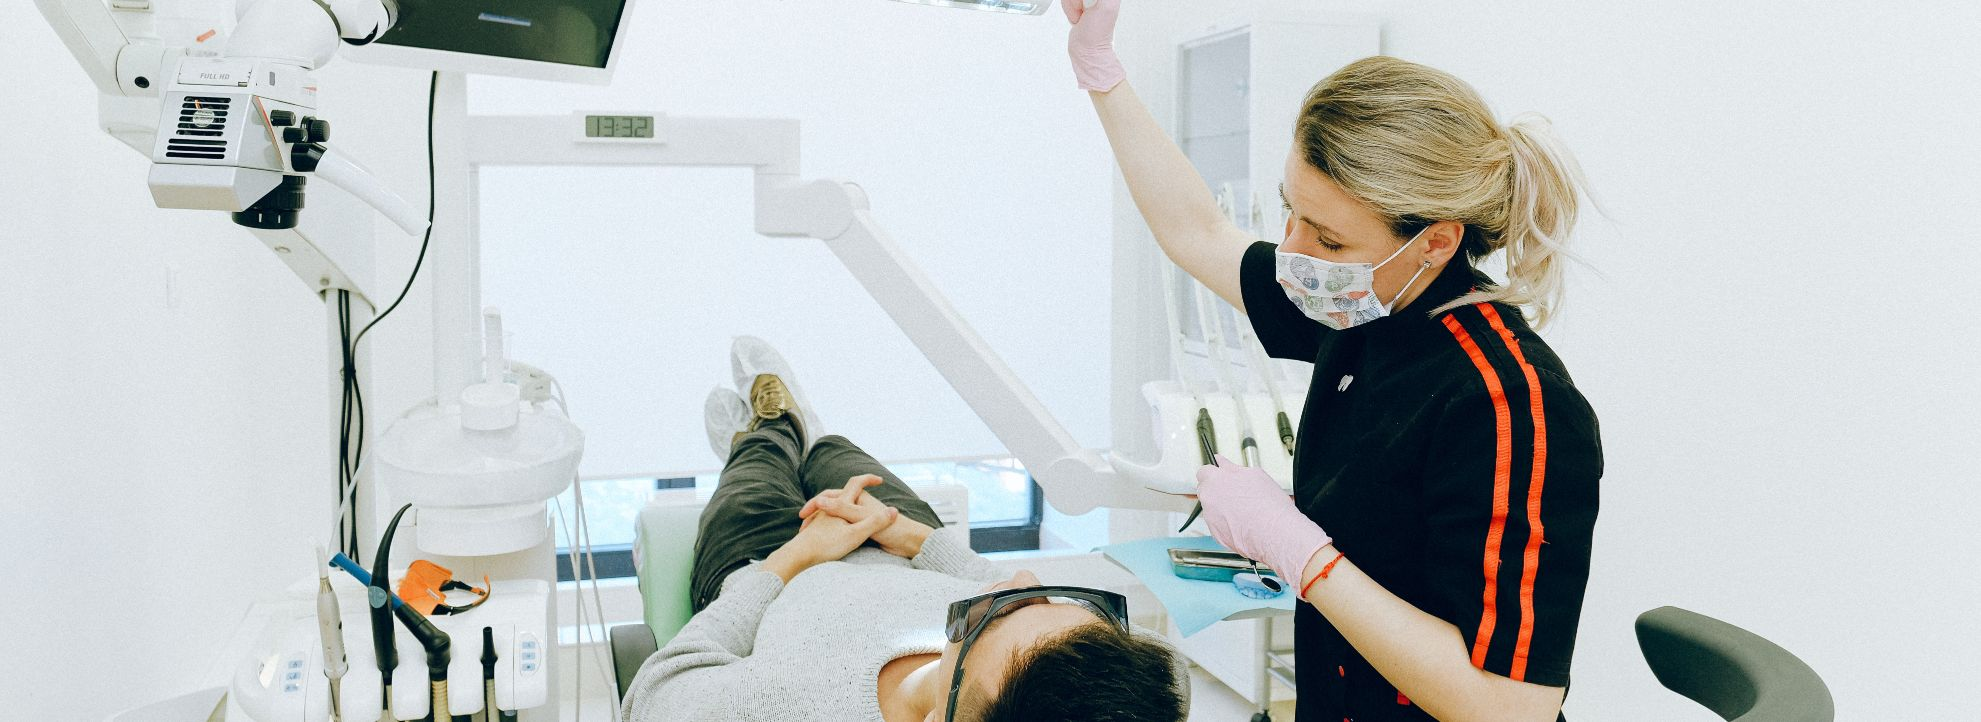

Based on Linear regression, Logistic regression is a classification method that estimates the probability of an event occurring based on binary class or multi-class target variables such as **[sick]** or **[not sick] **given dataset of independent variables. In this project, I'll be using Machine Learning to predict whether a person has diabetes or not, based on information about the patient such as blood pressure, body mass index (BMI), age, etc. 

Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split

# for plots
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# calculate accuracy measure and confussion matrix
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

# for google table
from google.colab import data_table
data_table.enable_dataframe_formatter()


Data Injestion

In [2]:
df_diab = pd.read_csv('health_care_diabetes.csv')
df_diab.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
48,7,103,66,32,0,39.1,0.344,31,1
711,5,126,78,27,22,29.6,0.439,40,0
380,1,107,72,30,82,30.8,0.821,24,0
94,2,142,82,18,64,24.7,0.761,21,0
446,1,100,72,12,70,25.3,0.658,28,0
122,2,107,74,30,100,33.6,0.404,23,0
632,2,111,60,0,0,26.2,0.343,23,0
562,1,87,68,34,77,37.6,0.401,24,0
365,5,99,54,28,83,34.0,0.499,30,0
668,6,98,58,33,190,34.0,0.430,43,0


Data Exploration

Exlaining the variables
- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration over 2 hours in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)2)
- DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes based on family history)
- Age: Age (years)
- Outcome: Class variable (0 if non-diabetic, 1 if diabetic)

In [3]:
# Check if columns have the right data type
df_diab.head().transpose()

,0,1,2,3,4
Pregnancies,6.000,1.000,8.000,1.000,0.000
Glucose,148.000,85.000,183.000,89.000,137.000
BloodPressure,72.000,66.000,64.000,66.000,40.000
SkinThickness,35.000,29.000,0.000,23.000,35.000
Insulin,0.000,0.000,0.000,94.000,168.000
BMI,33.600,26.600,23.300,28.100,43.100
DiabetesPedigreeFunction,0.627,0.351,0.672,0.167,2.288
Age,50.000,31.000,32.000,21.000,33.000
Outcome,1.000,0.000,1.000,0.000,1.000


In [4]:
# Summary statistics of variables
df_diab.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Summary Note
 - from the above functions we can see that Glucose, BloodPressure, SkinThickness, Insulin and BMI have min values of 0 which are not real clinical values. A value of 0 for Pregnancies is a real value.

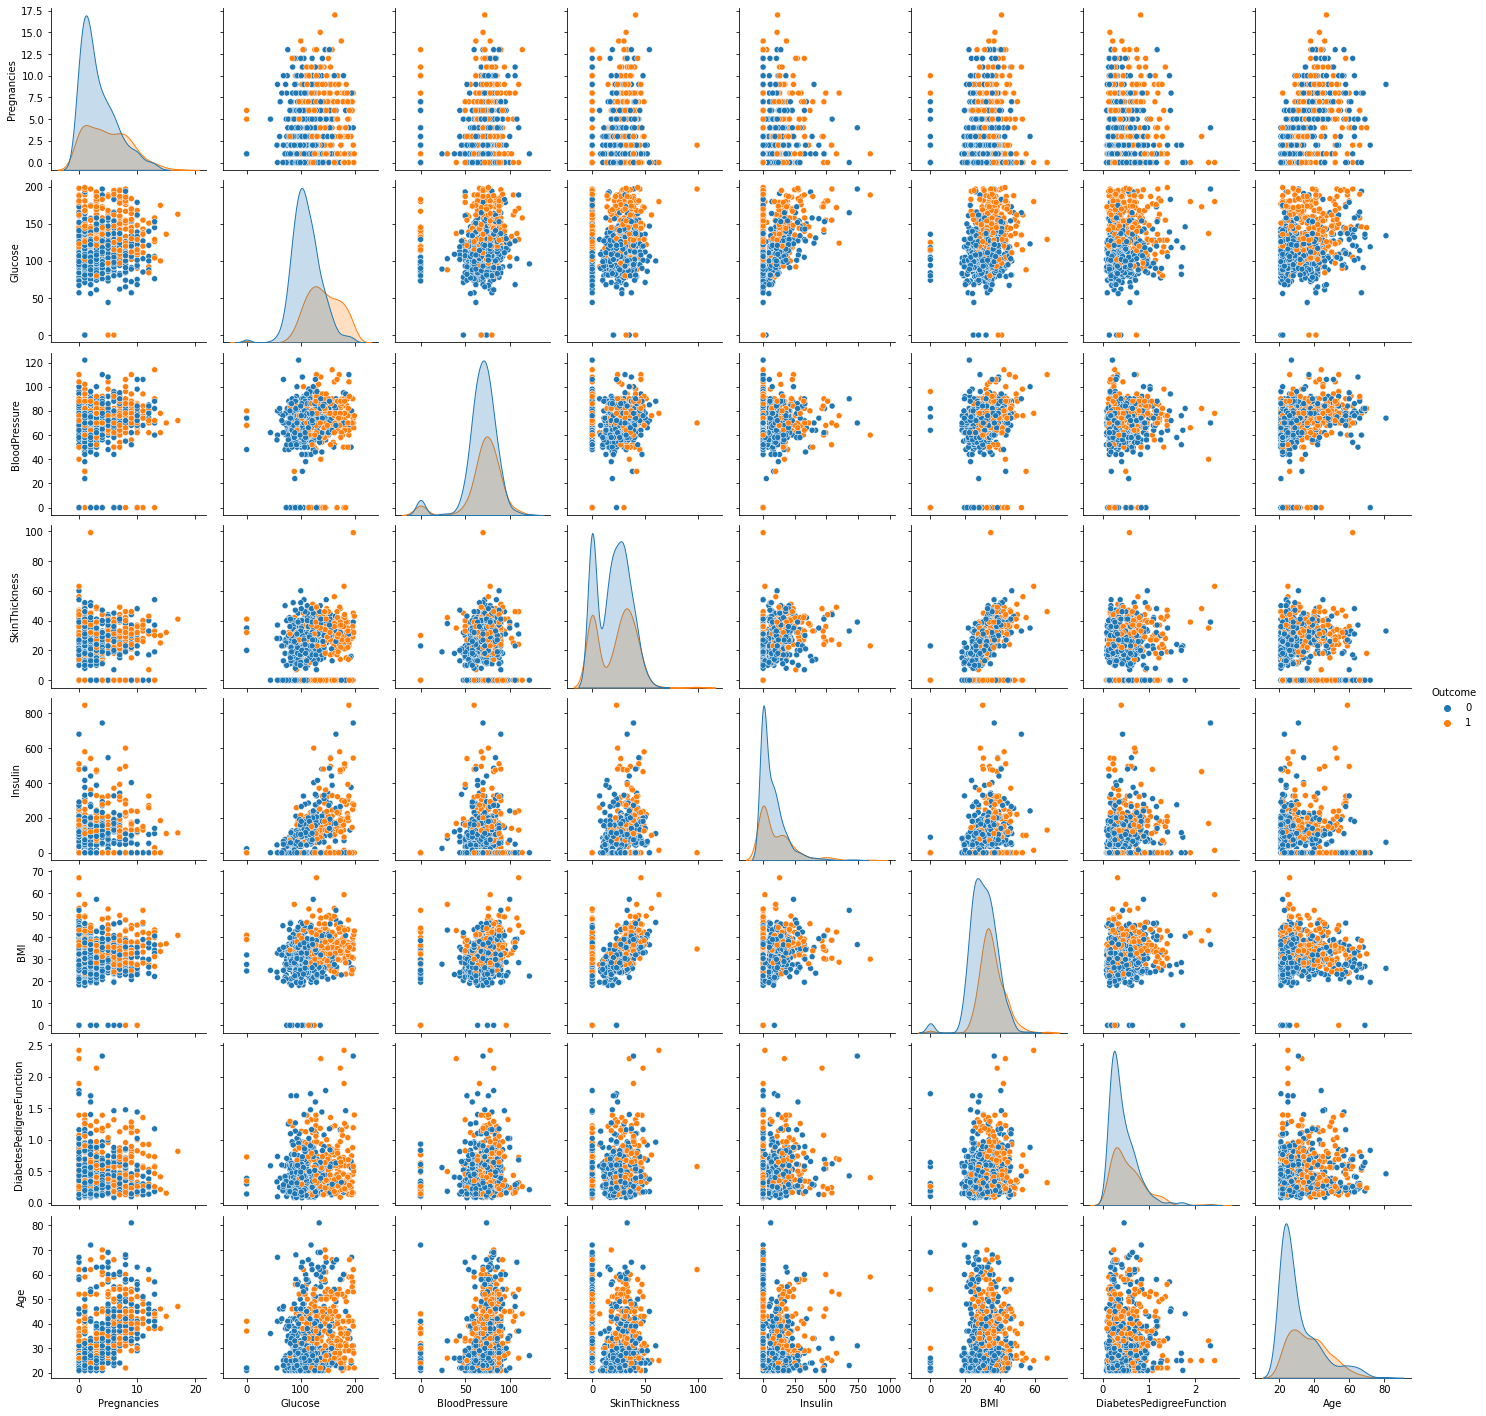

In [5]:
#  visualise the distribution of the data
sns.pairplot(df_diab, diag_kind='kde' , hue='Outcome')

Pairplot Note
- The pairplot is used to plot the relationships between each columns in a dataset such that each numeric variable form a grid of Axes shared across the y-axes across a single row and the x-axes across a single column with optional hue factor which as in the case above, I used the outcome which is the taget class variable of either 1 or 0s (0 if non-diabetic, 1 if diabetic) to creat a hue.

In [6]:
# confirming columns data types
df_diab.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [7]:
# find missing values
df_diab.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Note of Missing Values
- Although no missing values are present, summary notes abovce indicates there are 0 values in the columns where thy aren't valid. 
- So, It makes sense to find such invalid zeros

In [8]:
# find the invalid zeros
print("No. of 0s for Glucose:", df_diab['Glucose'].isin([0]).sum())
print("No. of 0s for Blood Pressure:", df_diab['BloodPressure'].isin([0]).sum())
print("No. of 0s for Skin Thickness:", df_diab['SkinThickness'].isin([0]).sum())
print("No. of 0s for Insulin:", df_diab['Insulin'].isin([0]).sum())
print("No. of 0s for BMI:", df_diab['BMI'].isin([0]).sum())

No. of 0s for Glucose: 5
No. of 0s for Blood Pressure: 35
No. of 0s for Skin Thickness: 227
No. of 0s for Insulin: 374
No. of 0s for BMI: 11


In [9]:
# Consider the 0s as missing values
# find the percentage of the os as missing values 
# in their corresponding columns
glucose = df_diab['Glucose'].isin([0]).sum() / 768*100
print("Percentage of missing data for Glocuse: %.2f" % glucose)
blood_pressure = df_diab['BloodPressure'].isin([0]).sum() / 768*100
print("Percentage of missing data for Blood Pressure: %.2f" % blood_pressure)

skin_thickness = df_diab['SkinThickness'].isin([0]).sum() / 768*100,
print("Percentage of missing data for Skin Thickness: %.2f" % skin_thickness)

insulin = df_diab['Insulin'].isin([0]).sum() / 768*100
print("Percentage of missing data for Insulin: %.2f" % insulin)

bmi = df_diab['BMI'].isin([0]).sum() / 768*100
print("Percentage of missing data for BMI: %.2f" % bmi)

Percentage of missing data for Glocuse: 0.65
Percentage of missing data for Blood Pressure: 4.56
Percentage of missing data for Skin Thickness: 29.56
Percentage of missing data for Insulin: 48.70
Percentage of missing data for BMI: 1.43


Notes 
- Although the isnull function inidicates no missing values based on NaN, as seen above however, there are missing values between 0.65%-48.6% of data for these variables based on invalid 0s categorized as missing values


Data Cleaning 
- Now that we have found that there are non-null missing (invalid 0s) values, let clean the data


In [10]:
# Create copy of data set prior  to wrangling operations 
# as we don't want to edit our raw data
df_diab_clean = df_diab.copy()

In [19]:
# Treat missing values (invlaid 0s) by
# Replacing with mean
df_diab_clean['Glucose'] = df_diab_clean['Glucose'].replace(0,df_diab['Glucose'].mean())
df_diab_clean['BloodPressure'] = df_diab_clean['BloodPressure'].replace(0,df_diab['BloodPressure'].mean())
df_diab_clean['SkinThickness'] = df_diab_clean['SkinThickness'].replace(0,df_diab['SkinThickness'].mean())
df_diab_clean['Insulin'] = df_diab_clean['Insulin'].replace(0,df_diab['Insulin'].mean())
df_diab_clean['BMI'] = df_diab_clean['BMI'].replace(0,df_diab['BMI'].mean())

In [23]:
df_diab_clean.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.855469,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,0.351857,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,1.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,1.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,1.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [21]:
# Changing number of pregancies to a binary variable of just 1 or 0.
# Make No. 1 where Where any pregnancy > 0. 
# 0 is already encoded as "No pregnancies"
df_diab_clean['Pregnancies'].values[df_diab_clean['Pregnancies'] > 0] = 1

In [22]:
df_diab_clean.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.855469,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,0.351857,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,1.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,1.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,1.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [25]:
# Exporting cleaned data to csv file 
# so that it can be used for other analysis including tableau dashboard
df_diab_clean.to_csv('health_care_diabetes_clean_07242022.csv')

Data Visualisation

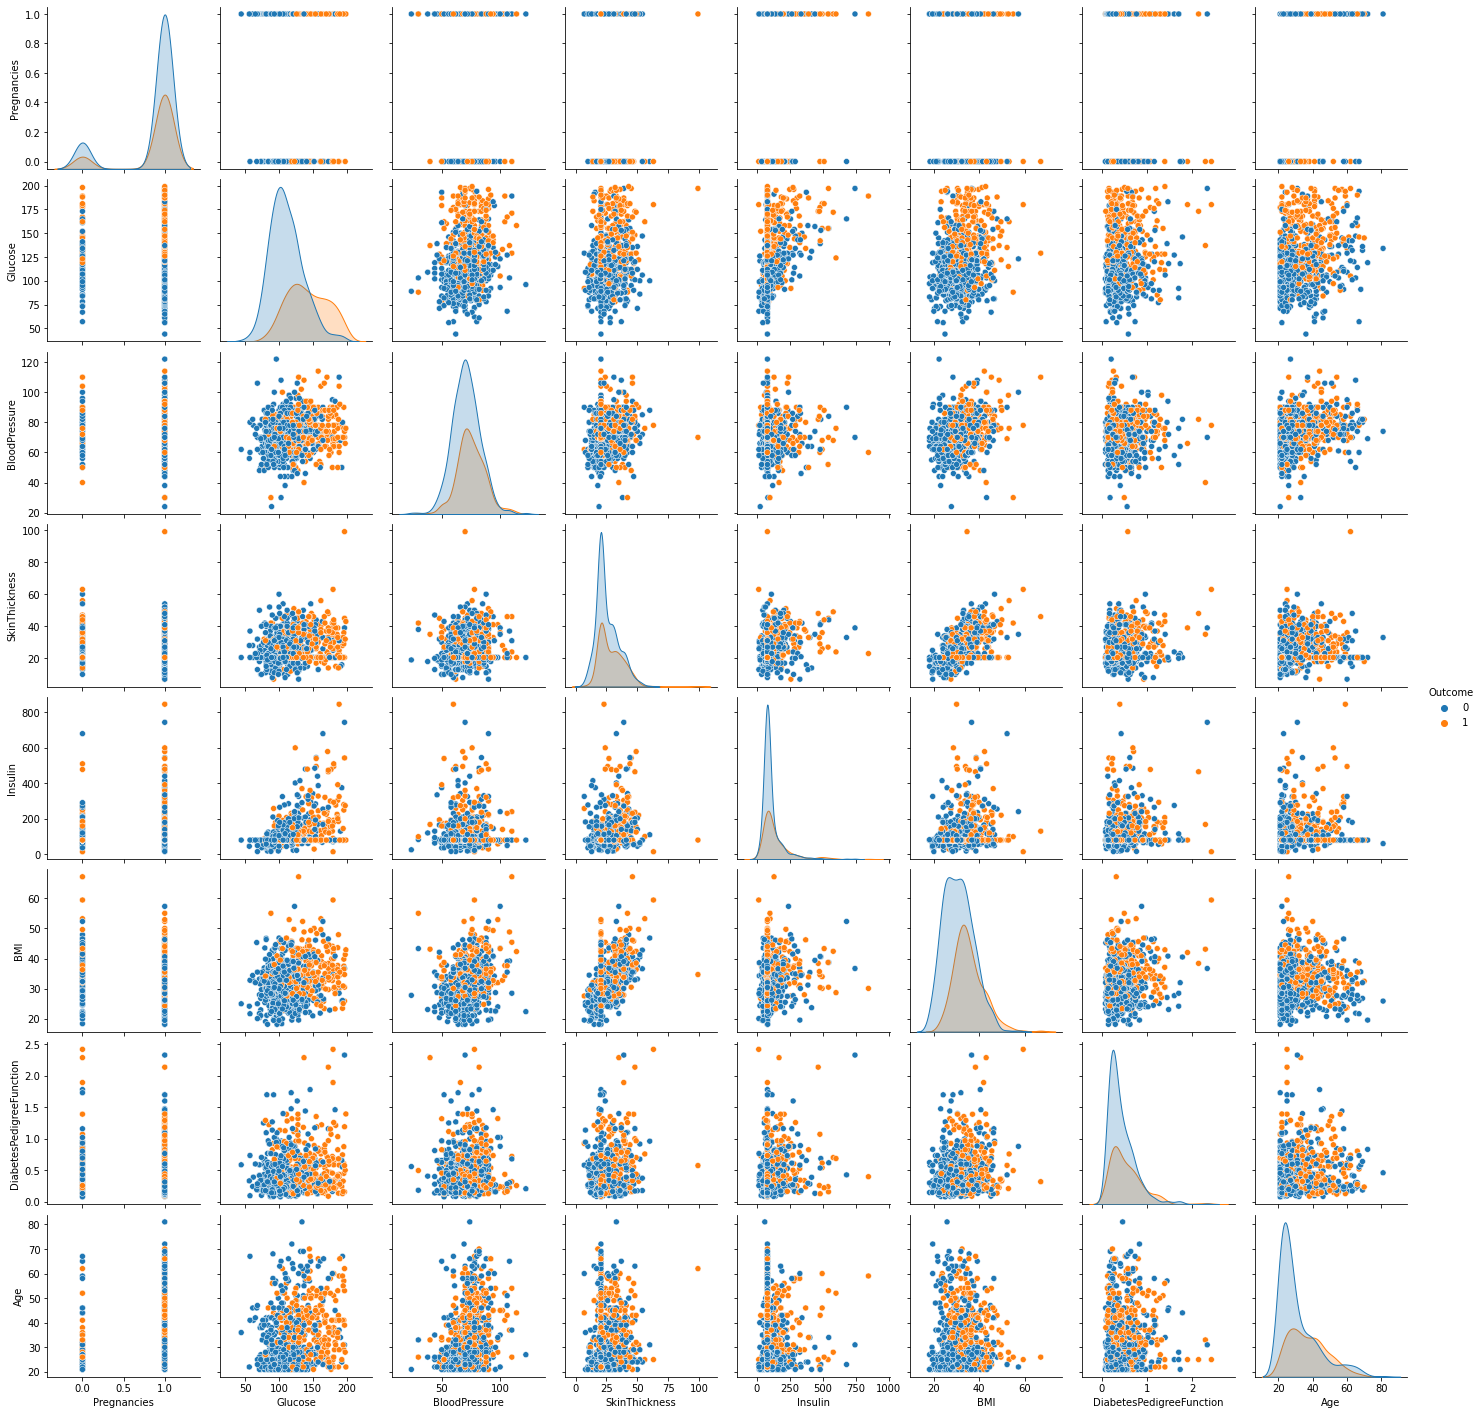

In [26]:
#check the paorplot with clean data
sns.pairplot(df_diab_clean, diag_kind='kde' , hue='Outcome')

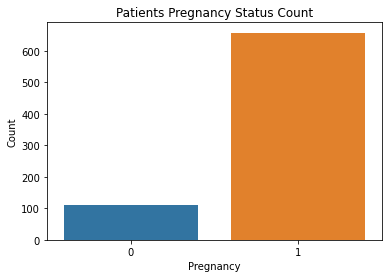

In [84]:
# Histogram of individual variables
# Pregnancy status
#sns.histplot(data=df_diab_clean, x="Pregnancies")
#plt.figure(figsize=(8,4))
sns.countplot(x='Pregnancies', data=df_diab_clean).set(title='Patients Pregnancy Status Count', xlabel='Pregnancy', ylabel='Count');

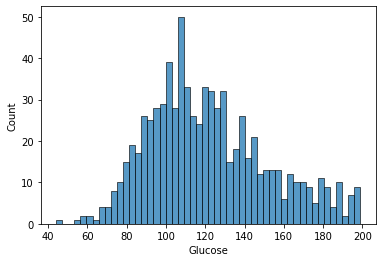

In [85]:
# Histogram Glucose
#plt.figure(figsize=(16,8))
sns.histplot(data=df_diab_clean, x="Glucose", bins=50);

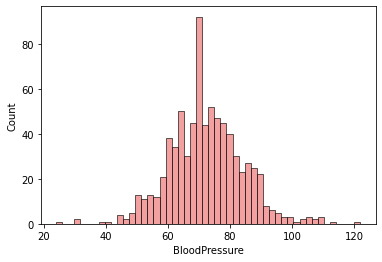

In [86]:
# Histogram of Blood Pressure
#plt.figure(figsize=(16,8))
sns.histplot(data=df_diab_clean, 
             x ="BloodPressure",
             color ='lightcoral',
             bins = 50 );

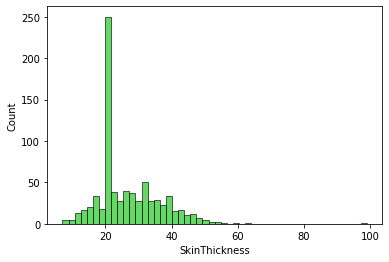

In [87]:
# Histogram of Skin Thickness
#plt.figure(figsize=(16,8))
sns.histplot(data=df_diab_clean, 
             x ="SkinThickness",
             color ='limegreen',
             bins = 50);

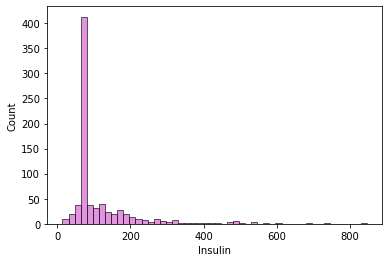

In [88]:
# Histogram of Insulin
#plt.figure(figsize=(16,8))
sns.histplot(data=df_diab_clean, 
             x ="Insulin",
             color ='orchid',
             bins = 50);

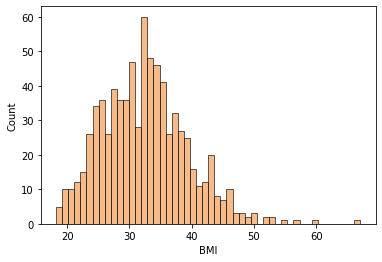

In [89]:
# Histogram of BMI
#plt.figure(figsize=(16,8))
sns.histplot(data=df_diab_clean, 
             x ="BMI",
             color ='sandybrown',
             bins = 50);

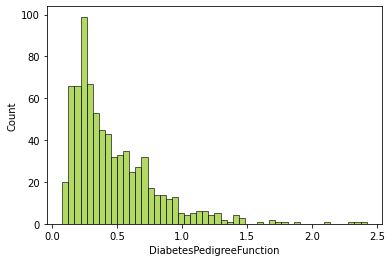

In [90]:
# Histogram of DiabetesPedigreeFunction 
#plt.figure(figsize=(16,8))
sns.histplot(data=df_diab_clean, 
             x ="DiabetesPedigreeFunction",
             color ='yellowgreen',
             bins = 50);

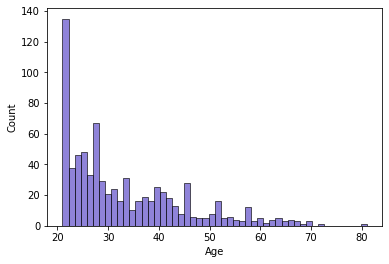

In [91]:
# Histogram of Age
#plt.figure(figsize=(16,8))
sns.histplot(data=df_diab_clean, 
             x ="Age",
             color ='slateblue',
             bins = 50);

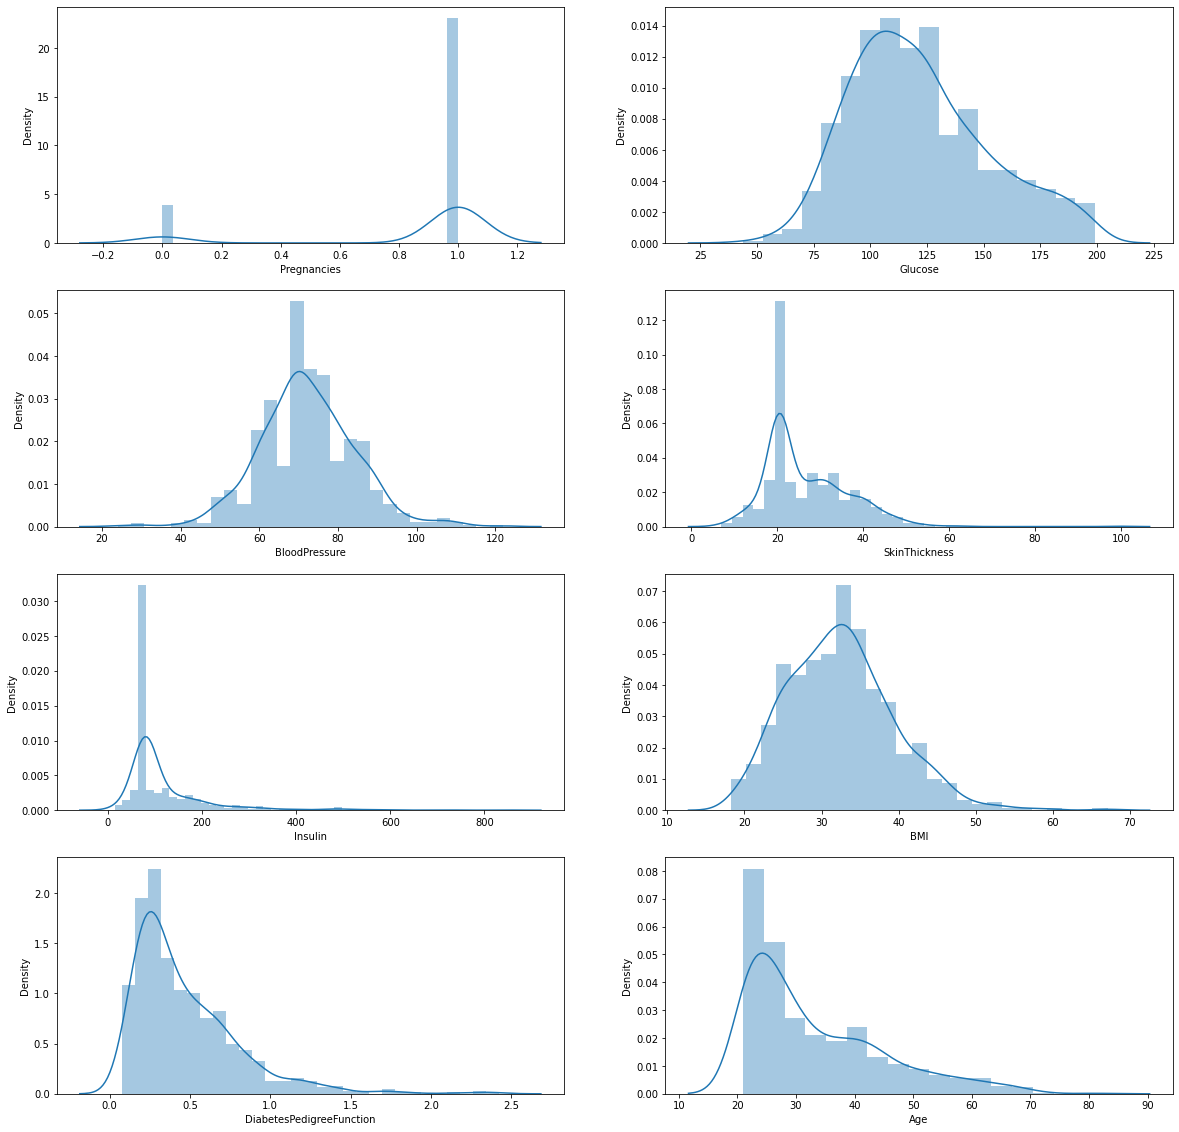

In [82]:
# Now we make continous (distribution) plots of quantitative data
# Except for Outcoume
fig=plt.figure(figsize=(20,20))
for i,col in enumerate(df_diab_clean.drop(['Outcome'],axis=1)):
    ax=fig.add_subplot(4,2,i+1)
    sns.distplot(df_diab_clean[col])

Observation
 - Blood pressure, Glucose and BMI are uniformly distributed.
 - Skin Thickness, Diabetes Pedigree Function, Pregnancies and Age are positively (right) skewed.
 - Blood Pressure, Skin Thickness, Insulin and BMI have zero values which can be regarded as outliers.

Analyzing the Outcome Variable

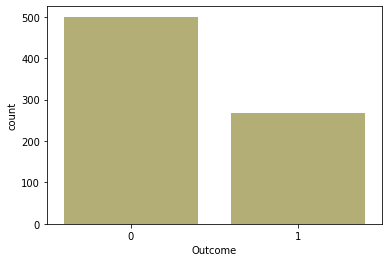

In [92]:
# Countplot of Outcome
# Where 1 is where a patient has diabetes
sns.countplot(data=df_diab_clean, 
             x ="Outcome",
             color ='darkkhaki');


In [93]:
 # Outcome value count
df_diab_clean['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [95]:
# % of the people with Diabetes
percent_diabetes = (268/768)*100
print("Percentage of people with diabetes: %.2f" % percent_diabetes )
# 34.9 % of patients have diabetes

Percentage of people with diabetes: 34.90


Correlation Analysis

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000 -0.017816      -0.038159      -0.067654   
Glucose                     -0.017816  1.000000       0.219666       0.160766   
BloodPressure               -0.038159  0.219666       1.000000       0.134155   
SkinThickness               -0.067654  0.160766       0.134155       1.000000   
Insulin                     -0.008117  0.396597       0.010926       0.240361   
BMI                         -0.161757  0.231478       0.281231       0.535703   
DiabetesPedigreeFunction    -0.060780  0.137106       0.000371       0.154961   
Age                          0.197159  0.266600       0.326740       0.026423   
Outcome                      0.005705  0.492908       0.162986       0.175026   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.008117 -0.161757                 -0.060780   
Glucose                   0.396597  0.231

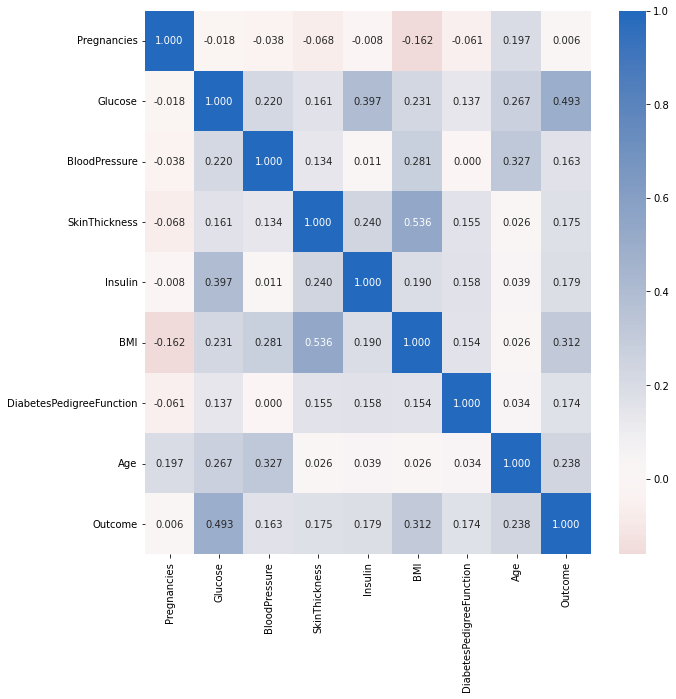

In [101]:
corr = df_diab_clean.corr()
print(corr)
plt.figure(figsize = [10, 10])
sns.heatmap(df_diab_clean.corr(), annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0);
# Returns a heatmap with Pearson correlation values

Summary Interpretation
- There's significant relationship between glucose level and diabetes outcome
- There's significant relationship between SkinThickness and BMI
- There's insignificant relationship being pregnant and diabetes outcome